In [29]:
from select import select
from certifi import where
from odps import ODPS
from odps import options
from odps.df import DataFrame
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

ACCESS_ID = 'LTAI5tMuyirvXSdReNRh2xBK'
SECRET_ACCESS_KEY = 'z9fsKUFRGmx3oS7qTcSARc6E5CoMkU'
ODPS_PROJECT = 'OpenDigger_prod_dev'
ODPS_ENDPOINT = 'http://service.cn-shanghai.maxcompute.aliyun.com/api'
# 创建odps实例
o = ODPS(ACCESS_ID, SECRET_ACCESS_KEY,
         project=ODPS_PROJECT, endpoint=ODPS_ENDPOINT)
options.tunnel.limit_instance_tunnel = False
# options.read_timeout = 3600000

github_log = DataFrame(o.get_table('ods_github_log'))
# print(github_log.dtypes)
repo = github_log.query("repo_name = 'Homebrew/legacy-homebrew' and pt>'20150101' and pt<'20220100'")
repo_df = repo.to_pandas()
repo_df.head(10)

,id,type,action,actor_id,actor_login,repo_id,repo_name,org_id,org_login,created_at,...,commit_comment_author_login,commit_comment_author_type,commit_comment_author_association,commit_comment_body,commit_comment_path,commit_comment_position,commit_comment_line,commit_comment_created_at,commit_comment_updated_at,pt
0,3870994881,PullRequestReviewCommentEvent,created,17938193,s172262,206084,Homebrew/legacy-homebrew,1503512,Homebrew,2016-04-11 15:53:14,...,,,,,,,,1970-01-01 08:00:00,1970-01-01 08:00:00,20160401
1,3931391336,WatchEvent,started,9153257,wfiskz,206084,Homebrew/legacy-homebrew,1503512,Homebrew,2016-04-25 20:18:28,...,,,,,,,,1970-01-01 08:00:00,1970-01-01 08:00:00,20160401
2,3881298358,WatchEvent,started,15334898,Ycomer,206084,Homebrew/legacy-homebrew,1503512,Homebrew,2016-04-13 11:20:18,...,,,,,,,,1970-01-01 08:00:00,1970-01-01 08:00:00,20160401
3,3868905594,IssueCommentEvent,created,18376110,AnalyzePlatypus,206084,Homebrew/legacy-homebrew,1503512,Homebrew,2016-04-10 16:36:55,...,,,,,,,,1970-01-01 08:00:00,1970-01-01 08:00:00,20160401
4,3842557863,CommitCommentEvent,,11892150,UniqMartin,206084,Homebrew/legacy-homebrew,1503512,Homebrew,2016-04-04 20:08:18,...,UniqMartin,User,,Thanks for adjusting this. Sorry that I wasn't...,,,,2016-04-04 20:08:18,2016-04-04 20:08:18,20160401
5,3839884711,IssueCommentEvent,created,11892150,UniqMartin,206084,Homebrew/legacy-homebrew,1503512,Homebrew,2016-04-03 19:29:16,...,,,,,,,,1970-01-01 08:00:00,1970-01-01 08:00:00,20160401
6,3839923740,IssueCommentEvent,created,11892150,UniqMartin,206084,Homebrew/legacy-homebrew,1503512,Homebrew,2016-04-03 20:09:24,...,,,,,,,,1970-01-01 08:00:00,1970-01-01 08:00:00,20160401
7,3840046811,IssueCommentEvent,created,11892150,UniqMartin,206084,Homebrew/legacy-homebrew,1503512,Homebrew,2016-04-03 21:59:39,...,,,,,,,,1970-01-01 08:00:00,1970-01-01 08:00:00,20160401
8,3840172725,IssueCommentEvent,created,11892150,UniqMartin,206084,Homebrew/legacy-homebrew,1503512,Homebrew,2016-04-03 23:41:12,...,,,,,,,,1970-01-01 08:00:00,1970-01-01 08:00:00,20160401
9,3840738254,IssueCommentEvent,created,11892150,UniqMartin,206084,Homebrew/legacy-homebrew,1503512,Homebrew,2016-04-04 06:45:52,...,,,,,,,,1970-01-01 08:00:00,1970-01-01 08:00:00,20160401


In [31]:
# 时间处理
repo_df['time'] = pd.to_datetime(repo_df['created_at'],format='%Y-%m-%d %H:%M:%S')
repo_df['year'] = repo_df['time'].dt.year
repo_df['month'] = repo_df['time'].dt.month
repo_df['month'] = repo_df['month'].map("{:02}".format)
repo_df['ym'] = repo_df['year'].astype(str).str.cat(repo_df['month'].astype(str))
# repo_df.to_csv("./data/incubator-weex.csv")

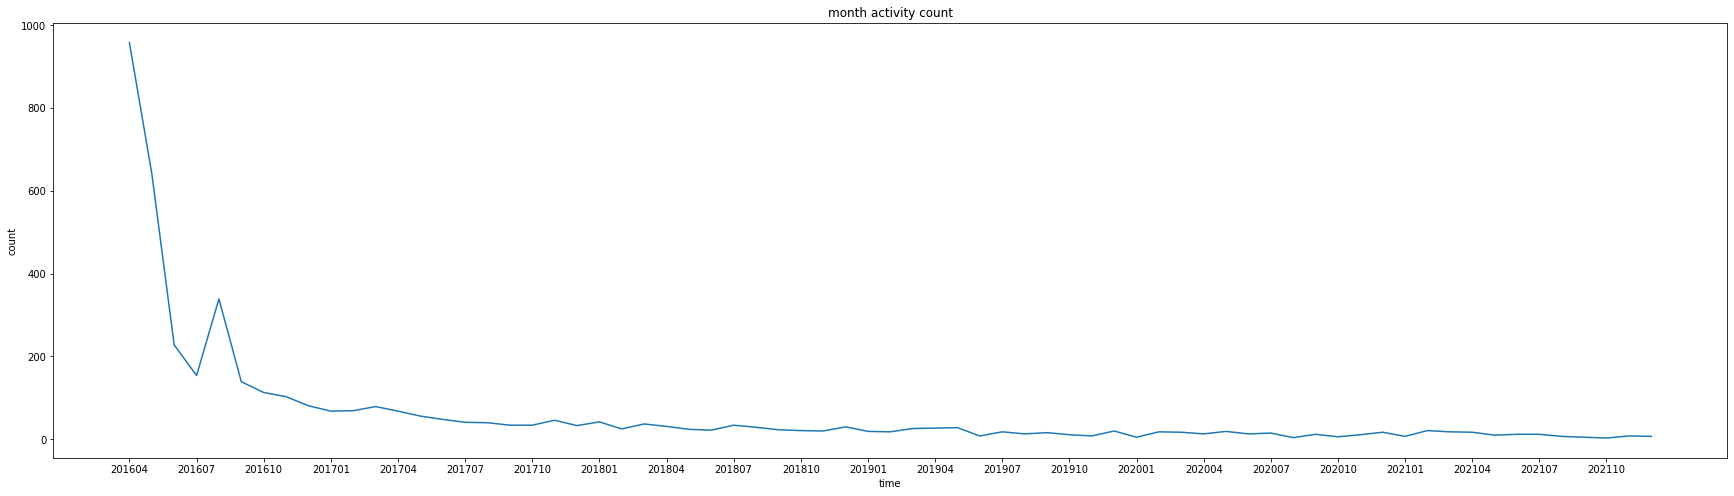

In [32]:
# 每月活跃事件数量
data = repo_df.groupby("ym").agg('count')['id']
plt.figure(figsize=(30,8))
plt.xticks(np.arange(0, data.size, step=3))
plt.title("month activity count") 
plt.xlabel("time") 
plt.ylabel("count") 
plt.plot(data.index,data) 
plt.show()
# data.index

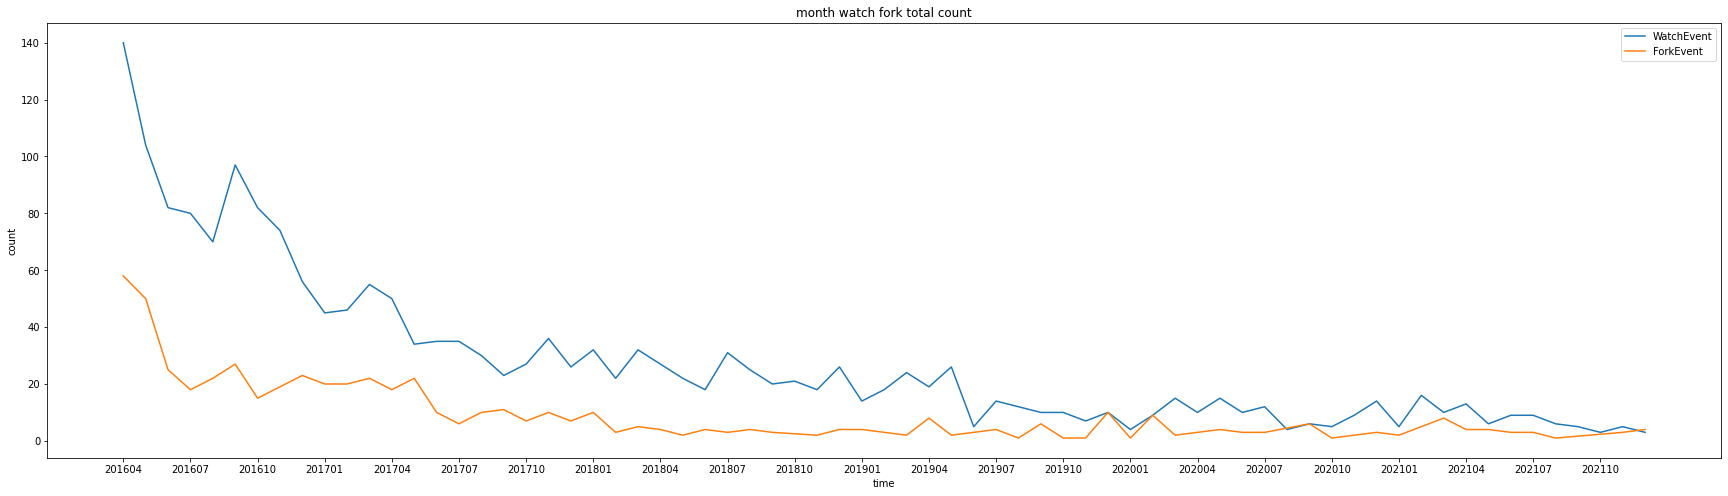

In [33]:
# 每月新增 Star 和 Frok 的个数
data5 = repo_df[repo_df.type == 'WatchEvent']
data5 = data5.groupby("ym").agg('count')['id']
data5_diff = data5.diff()
data6 = repo_df[repo_df.type == 'ForkEvent']
data6 = data6.groupby("ym").agg('count')['id']
data6_diff = data6.diff()

plt.figure(figsize=(30,8))
plt.xticks(np.arange(0, data5.size, step=3))
plt.title("month watch fork total count") 
plt.xlabel("time") 
plt.ylabel("count") 
plt.plot(data5.index,data5, color='tab:blue', label='WatchEvent') 
plt.plot(data6.index,data6, color='tab:orange', label='ForkEvent')
plt.legend() 
plt.show()


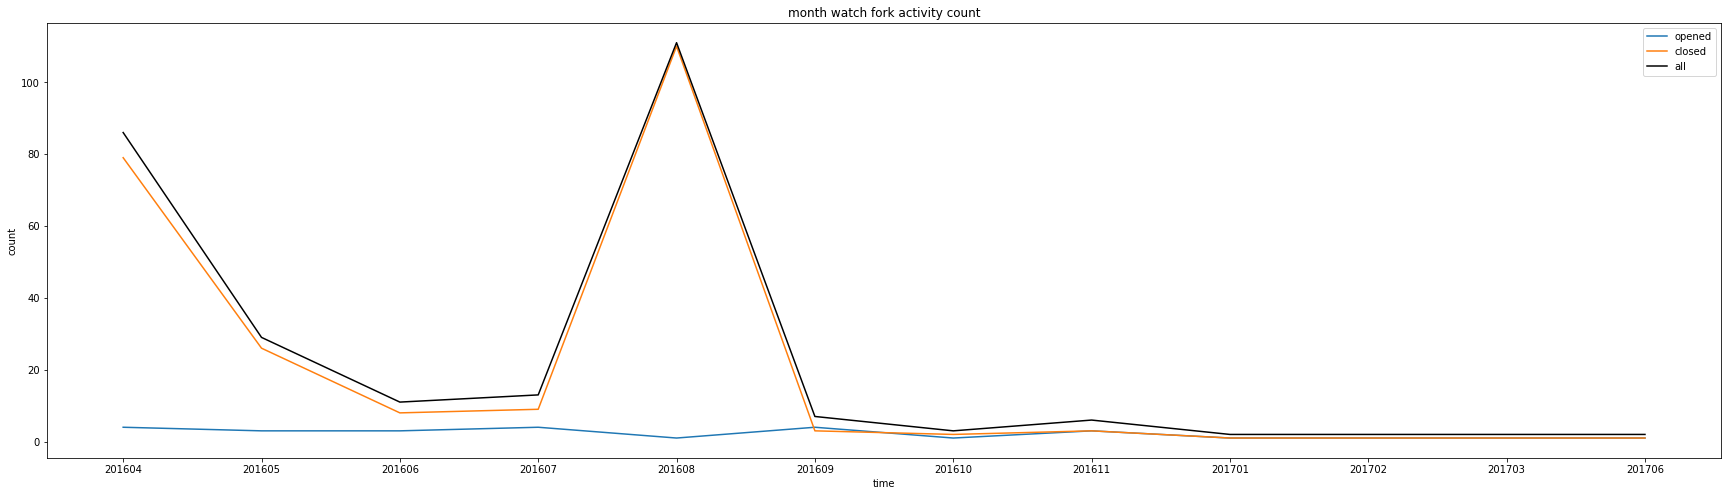

In [34]:
# 每月打开 Issue 和 关闭 Issue 的个数
data7 = repo_df[(repo_df.type == 'IssuesEvent') & (repo_df.action == 'opened')]
data7 = data7.groupby("ym").agg('count')['id']
data8 = repo_df[(repo_df.type == 'IssuesEvent') & (repo_df.action=='closed')]
data8 = data8.groupby("ym").agg('count')['id']
data9 = repo_df[(repo_df.type == 'IssuesEvent')]
data9 = data9.groupby("ym").agg('count')['id']
plt.figure(figsize=(30,8))
plt.title("month watch fork activity count") 
plt.xlabel("time") 
plt.ylabel("count") 
plt.plot(data7.index,data7, color='tab:blue', label='opened') 
plt.plot(data8.index,data8, color='tab:orange', label='closed') 
plt.plot(data9.index,data9, color='k', label='all') 
plt.legend()
plt.show()

In [10]:
# 每月在仓库中活跃（只要有日志产生就算）的不同开发者（也就是一个GitHub账号）总数
sql = """
    set odps.sql.validate.orderby.limit=false;
    select count(distinct(actor_id)) as count ,pt from ods_github_log where pt>'0'and pt <'20220100' and repo_name='Homebrew/legacy-homebrew' group by pt order by pt;
"""
with o.execute_sql(sql, hints={'odps.sql.allow.fullscan': 'true', 'odps.sql.submit.mode': 'script'}).open_reader() as reader4:
    # print(reader4.raw)
    # data2 = reader4.raw
    list = []
    for record in reader4:
        list.append([record["count"], record["pt"]])
        # print(record["count"],record["pt"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


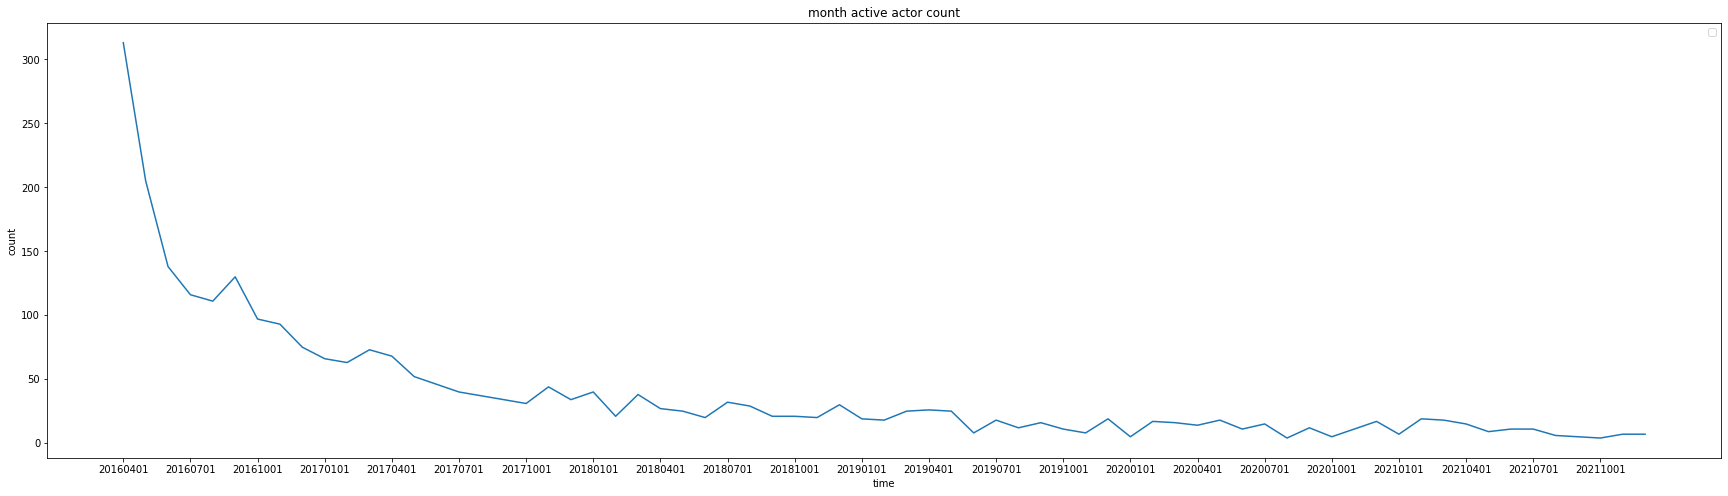

In [11]:
data2 = pd.DataFrame(list)
plt.figure(figsize=(30,8))
plt.xticks(np.arange(0, data5.size, step=3))
plt.title("month active actor count") 
plt.xlabel("time") 
plt.ylabel("count") 
plt.plot(data2[1],data2[0]) 
plt.legend()
plt.show()

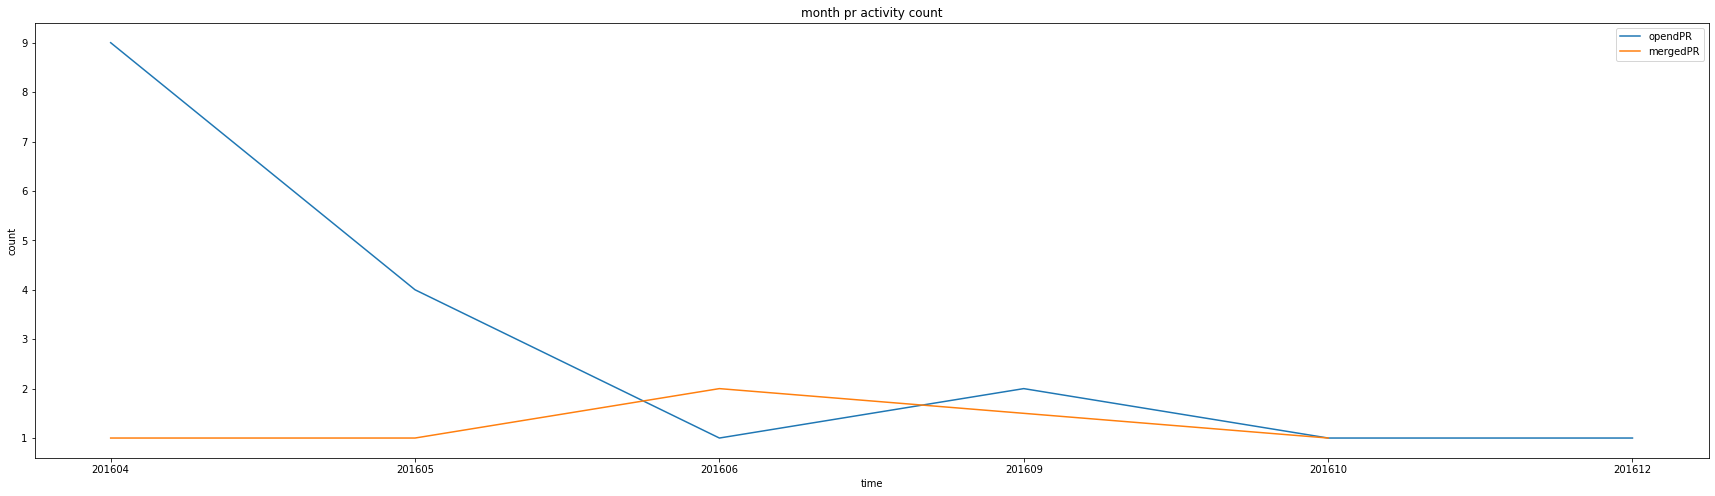

In [35]:
# 每月打开 PR 和合入 PR 的个数（注意，关闭 PR 不等于合入）
data3 = repo_df[(repo_df.type == 'PullRequestEvent') & (repo_df.action == 'opened')]
data3 = data3.groupby("ym").agg('count')['id']
data4 = repo_df[(repo_df.type == 'PullRequestEvent') & (repo_df.pull_merged == 1)]
data4 = data4.groupby("ym").agg('count')['id']
plt.figure(figsize=(30,8))
plt.title("month pr activity count") 
plt.xlabel("time") 
plt.ylabel("count") 
plt.plot(data3.index,data3, color='tab:blue', label='opendPR') 
plt.plot(data4.index,data4, color='tab:orange', label='mergedPR') 
plt.legend()
plt.show()

In [39]:
# Issue 从打开到关闭的平均时长和中位数（单位：天）
sql = """
    set odps.sql.validate.orderby.limit=false;
    select count(distinct(action)) as ac_count, datediff(max(created_at), min(created_at), 'dd') as diff_time from ods_github_log where pt>'0' and pt <'20220100' and repo_name='Homebrew/legacy-homebrew' and type='IssuesEvent' and action != '' group by issue_number having ac_count >= 2;
"""
with o.execute_sql(sql, hints={'odps.sql.allow.fullscan': 'true', 'odps.sql.submit.mode': 'script'}).open_reader() as reader4:
    # print(reader4.raw)
    # data2 = reader4.raw
    list = []
    for record in reader4:
        list.append([record["ac_count"], record["diff_time"]])
        # print(record["count"],record["pt"])

In [42]:
data9 = pd.DataFrame(list)
print("Issue 从打开到关闭的平均时长:{}天\nIssue 从打开到关闭的中位数:{}天".format(data9.mean()[1], data9.median()[1]))

Issue 从打开到关闭的平均时长:13.233333333333333天
Issue 从打开到关闭的中位数:0.0天


In [43]:
# PR 从打开到合入的平均时长和中位数（单位：天）
sql = """
    set odps.sql.validate.orderby.limit=false;
    select count(distinct(action)) as ac_count, datediff(max(created_at), min(created_at), 'dd') as diff_time from ods_github_log where pt>'0' and pt<='20220100' and repo_name='Homebrew/legacy-homebrew' and type='PullRequestEvent' and action != '' group by issue_number having ac_count >= 2;
"""
with o.execute_sql(sql, hints={'odps.sql.allow.fullscan': 'true', 'odps.sql.submit.mode': 'script'}).open_reader() as reader4:
    # print(reader4.raw)
    # data2 = reader4.raw
    list = []
    for record in reader4:
        list.append([record["ac_count"], record["diff_time"]])
        # print(record["count"],record["pt"])

In [44]:
data10 = pd.DataFrame(list)
# data10
print("PR 从打开到合入的平均时长:{}天\nPR 从打开到合入的中位数:{}天(0天代表24小时之内)".format(data10.mean()[1], data10.median()[1]))

PR 从打开到合入的平均时长:3.1666666666666665天
PR 从打开到合入的中位数:0.5天(0天代表24小时之内)


In [60]:
# Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）
sql = """
    set odps.sql.validate.orderby.limit=false;
    select 
        datediff(min(issue_comment_created_at), min(issue_created_at), 'dd') as diff_time 
        from ods_github_log 
        where pt>'0' 
        and pt<='20220100'
        and repo_name='Homebrew/legacy-homebrew' 
        and type='IssueCommentEvent'
        and issue_comment_author_id != issue_author_id
        group by issue_id;
"""
list = []
with o.execute_sql(sql, hints={'odps.sql.allow.fullscan': 'true', 'odps.sql.submit.mode': 'script'}).open_reader() as reader4:
    # print(reader4.raw)
    # data2 = reader4.raw
    for record in reader4:
        list.append(record["diff_time"])
        # print(record["count"],record["pt"])

In [61]:
data11 = pd.DataFrame(list)
print("Issue和PR从打开到第一次有人回复（非本人回复）的平均时长:{}\nIssue和PR从打开到第一次有人回复（非本人回复）的中位数:{}".format(data11.mean()[0], data11.median()[0]))

Issue和PR从打开到第一次有人回复（非本人回复）的平均时长:190.25054945054944
Issue和PR从打开到第一次有人回复（非本人回复）的中位数:136.0


## 关键或值得关注的时间节点
2016年4月份项目刚创建的时候活跃度非常高，后面热度逐步减少2017年6月份之后仓库废弃，再也没有PR相关提交合并。
